In [1]:
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import random

In [2]:
# Read the parquet file
train_df = pq.read_table("train.parquet").to_pandas()

In [3]:
train_df.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


In [4]:
train_df.drop_duplicates(keep="first")

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [5]:
train_df["Incident"].unique()

array(['PRIMARY_DIAGNOSIS', 'SYMPTOM_TYPE_0', 'DRUG_TYPE_0',
       'DRUG_TYPE_1', 'DRUG_TYPE_2', 'TEST_TYPE_0', 'DRUG_TYPE_3',
       'DRUG_TYPE_4', 'DRUG_TYPE_5', 'DRUG_TYPE_6', 'DRUG_TYPE_8',
       'DRUG_TYPE_7', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_10', 'SYMPTOM_TYPE_29',
       'SYMPTOM_TYPE_2', 'DRUG_TYPE_11', 'DRUG_TYPE_9', 'DRUG_TYPE_13',
       'SYMPTOM_TYPE_5', 'TEST_TYPE_1', 'SYMPTOM_TYPE_6', 'TEST_TYPE_2',
       'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_8', 'DRUG_TYPE_14', 'DRUG_TYPE_12',
       'SYMPTOM_TYPE_9', 'SYMPTOM_TYPE_10', 'SYMPTOM_TYPE_7',
       'SYMPTOM_TYPE_11', 'TEST_TYPE_3', 'DRUG_TYPE_15', 'SYMPTOM_TYPE_4',
       'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_16',
       'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_15', 'SYMPTOM_TYPE_18',
       'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_20', 'SYMPTOM_TYPE_21',
       'DRUG_TYPE_17', 'SYMPTOM_TYPE_22', 'TEST_TYPE_4',
       'SYMPTOM_TYPE_23', 'DRUG_TYPE_16', 'TEST_TYPE_5',
       'SYMPTOM_TYPE_19', 'SYMPTOM_TYPE_24', 'SYMPTOM_TYPE_25',
   

In [6]:
target_drug = train_df.groupby("Patient-Uid")["Incident"].apply(lambda x : x[x=="TARGET DRUG"].count())

In [7]:
target_drug

Patient-Uid
a0db1e73-1c7c-11ec-ae39-16262ee38c7f    0
a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f    0
a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f    0
a0dc950b-1c7c-11ec-b6ec-16262ee38c7f    0
a0dc9543-1c7c-11ec-bb63-16262ee38c7f    0
                                       ..
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f    2
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f    1
a0f0d523-1c7c-11ec-89d2-16262ee38c7f    3
a0f0d553-1c7c-11ec-a70a-16262ee38c7f    1
a0f0d582-1c7c-11ec-a6c1-16262ee38c7f    3
Name: Incident, Length: 27033, dtype: int64

In [8]:
counts_df = pd.DataFrame(target_drug)

In [9]:
counts_df.head()

,Incident
Patient-Uid,
a0db1e73-1c7c-11ec-ae39-16262ee38c7f,0
a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,0
a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,0
a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,0
a0dc9543-1c7c-11ec-bb63-16262ee38c7f,0


In [10]:
counts_df.reset_index(inplace=True)

In [11]:
counts_df.rename({"index":"Patient-Uid","Incident":"target_drug_count"},axis=1,inplace=True)

In [12]:
counts_df.head()

,Patient-Uid,target_drug_count
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,0
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,0
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,0
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,0
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,0


In [13]:
target_drug_prescribed = counts_df[counts_df["target_drug_count"]>0]

In [14]:
target_drug_prescribed

,Patient-Uid,target_drug_count
17659,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,3
17660,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,11
17661,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,4
17662,a0e9c414-1c7c-11ec-889a-16262ee38c7f,12
17663,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,8
...,...,...
27028,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,2
27029,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,1
27030,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,3
27031,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,1


In [15]:
maxi = max(target_drug_prescribed["target_drug_count"])

In [16]:
maxi

45

In [17]:
counts =[]
drugs_taken =[]

In [18]:
for i in range(1,maxi+1):
    a = target_drug_prescribed.loc[target_drug_prescribed["target_drug_count"]>=i,["target_drug_count"]].count()
    counts.append(a[0])
    drugs_taken.append(i)
    
    

In [19]:
counts

[9374,
 8478,
 7611,
 6647,
 5762,
 5043,
 4334,
 3711,
 3211,
 2684,
 2195,
 1792,
 1434,
 1154,
 889,
 635,
 425,
 335,
 272,
 223,
 174,
 152,
 121,
 99,
 86,
 69,
 59,
 50,
 43,
 35,
 27,
 21,
 14,
 11,
 9,
 8,
 7,
 6,
 4,
 3,
 3,
 2,
 2,
 2,
 2]

In [20]:
drugs_taken

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45]

In [21]:
from matplotlib import pyplot as plt

<ipython-input-22-96eb8b51a9f3>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt1.show()


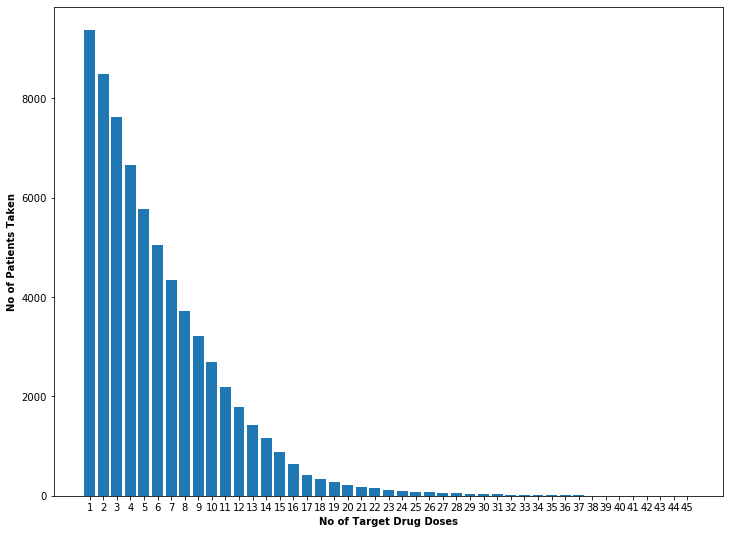

In [22]:
plt1 = plt.figure(figsize=(12,9))

plt.bar(drugs_taken,counts)
plt.xlabel("No of Target Drug Doses", fontweight='bold')
plt.ylabel("No of Patients Taken", fontweight='bold')
plt.xticks(drugs_taken)
plt1.show()


In [24]:
mean_df = train_df.copy()

In [25]:
mean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3220868 entries, 0 to 29080911
Data columns (total 3 columns):
 #   Column       Dtype         
---  ------       -----         
 0   Patient-Uid  object        
 1   Date         datetime64[ns]
 2   Incident     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 98.3+ MB


In [26]:
mean_df = mean_df.sort_values(['Patient-Uid','Date'])

In [27]:
mean_df['diff'] =mean_df.groupby('Patient-Uid')['Date'].diff() / np.timedelta64(1, 'D')

In [28]:
mean_df['diff'] = mean_df['diff'].fillna(0)

In [29]:
mean_df.head(5)

,Patient-Uid,Date,Incident,diff
1750087,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2015-09-22,DRUG_TYPE_7,0.0
1473893,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-04-13,SYMPTOM_TYPE_2,934.0
1387922,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-05-02,DRUG_TYPE_7,19.0
223191,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,SYMPTOM_TYPE_0,205.0
557302,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2018-11-23,DRUG_TYPE_9,0.0


In [30]:
mean_days = mean_df.copy()

In [31]:
mean_days = mean_days.groupby("Patient-Uid")["diff"].mean()

In [32]:
mean_days = pd.DataFrame(mean_days)

In [33]:
mean_days

,diff
Patient-Uid,
a0db1e73-1c7c-11ec-ae39-16262ee38c7f,18.572917
a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,16.651376
a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,14.877551
a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,17.486239
a0dc9543-1c7c-11ec-bb63-16262ee38c7f,7.979508
...,...
a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,19.415842
a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,21.215909
a0f0d523-1c7c-11ec-89d2-16262ee38c7f,16.982609


In [34]:
mean_days.reset_index(inplace=True)

In [35]:
mean_days.rename({"index":"Patient-Uid","diff":"mean_days"},axis=1,inplace=True)

In [36]:
mean_days.head(5)

,Patient-Uid,mean_days
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,18.572917
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,16.651376
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,14.877551
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,17.486239
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,7.979508


In [38]:
result_df = pd.merge(counts_df,mean_days,on="Patient-Uid",how="inner")

In [39]:
result_df.head(5)

,Patient-Uid,target_drug_count,mean_days
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,0,18.572917
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,0,16.651376
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,0,14.877551
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,0,17.486239
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,0,7.979508


In [42]:
result_df[result_df["target_drug_count"]==3]

,Patient-Uid,target_drug_count,mean_days
17659,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,3,16.965517
17669,a0e9c561-1c7c-11ec-ac1a-16262ee38c7f,3,7.896000
17694,a0e9ca1c-1c7c-11ec-8c5d-16262ee38c7f,3,19.220000
17715,a0e9ce11-1c7c-11ec-8a63-16262ee38c7f,3,14.646154
17717,a0e9ce71-1c7c-11ec-8b96-16262ee38c7f,3,10.031088
...,...,...,...
27014,a0f0d230-1c7c-11ec-8152-16262ee38c7f,3,27.295775
27019,a0f0d31d-1c7c-11ec-a62e-16262ee38c7f,3,12.121019
27024,a0f0d40a-1c7c-11ec-afb8-16262ee38c7f,3,11.147727
27030,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,3,16.982609


In [54]:
counts1=[]
drugs_taken1=[]

In [55]:
for i in range(0,maxi+1):
    a = result_df.loc[result_df["target_drug_count"]==i,["mean_days"]].mean()
    counts1.append(a[0])
    drugs_taken1.append(i)

In [56]:
counts1

[21.370577132092627,
 16.192715160661752,
 16.209440725633492,
 16.05266247191573,
 16.00139819235288,
 15.75814192047449,
 15.264509261176247,
 15.32980348262926,
 15.482702409875566,
 15.7160130112982,
 14.933538010315043,
 14.916035359654998,
 15.283830276453827,
 14.07949340112359,
 15.118668779395588,
 14.07634848349188,
 14.70428924577557,
 14.383789434628474,
 13.640576522153067,
 13.440011260811614,
 13.095927460068953,
 12.665818006732968,
 11.037916215042682,
 12.330184332854959,
 13.874153454731896,
 10.988660248310145,
 12.166556816103848,
 10.724518997297848,
 8.807874410130337,
 8.330648684142492,
 10.712806389037171,
 10.232707850374785,
 13.106013979105239,
 10.434272986558229,
 13.50937019969278,
 16.035714285714285,
 16.39316239316239,
 13.2015503875969,
 7.838430612975683,
 14.306569343065693,
 nan,
 14.96923076923077,
 nan,
 nan,
 nan,
 9.255378807715807]

In [57]:
drugs_taken1

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45]

<ipython-input-59-830c9bad0ca7>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt1.show()


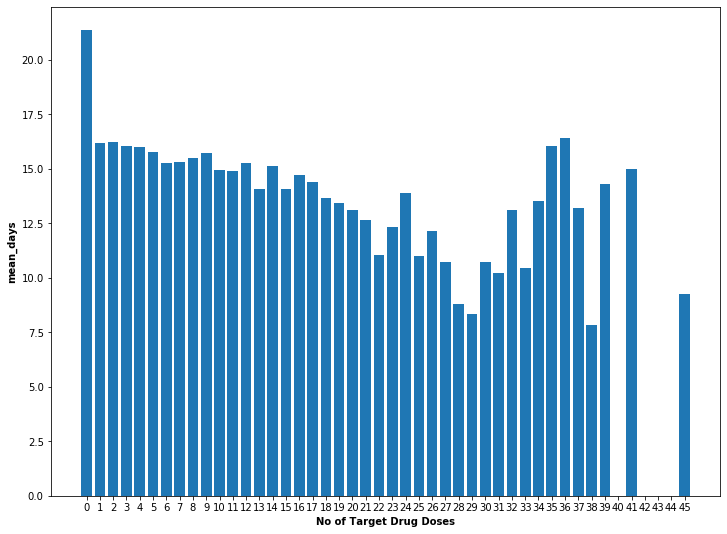

In [59]:
plt1 = plt.figure(figsize=(12,9))

plt.bar(drugs_taken1,counts1)
plt.xlabel("No of Target Drug Doses", fontweight='bold')
plt.ylabel("mean_days", fontweight='bold')
plt.xticks(drugs_taken1)
plt1.show()
